In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
df0 = pd.read_csv("datasets/data_clean2_2019.csv")

C:\Users\david\AppData\Local\Temp\ipykernel_36624\2020476196.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv("datasets/data_clean2_2019.csv")


In [3]:
df = df0.copy()

In [4]:
df

,Date,Booking ID,Requested Pickup Time,Week Day,Provider,Vehicle Type,Run,Space Type,Ambulatory,Origin Postal code,Pickup Arrival Time,Pickup Departure Time,Destination Postal code,Dropoff Arrival Time,Dropoff Departure Time,Trip Count,Origin1,Origin2,Destination1,Destination2
0,2019-01-01,10721655,09:00,2,VETS,VAN 2WK,VV401,AM,Y,L9C5W5,09:05,09:06,L8M1W9,09:19,09:19,1,L9C,5W5,L8M,1W9
1,2019-01-01,10721656,14:00,2,VETS,VAN 2WK,VV401,AM,Y,L8M1W9,NaN,NaN,L9C5W5,13:50,13:50,1,L8M,1W9,L9C,5W5
2,2019-01-01,10725059,12:00,2,VETS,VAN 2WK,VV409,WK,Y,L9C5H2,12:11,12:14,L8M1W9,12:29,12:36,1,L9C,5H2,L8M,1W9
3,2019-01-01,10725379,10:00,2,VETS,VAN 2WK,VV400,WK,Y,L9G0C1,09:29,09:31,L8M1W9,09:54,09:54,1,L9G,0C1,L8M,1W9
4,2019-01-01,10727509,13:00,2,VETS,VAN 2WK,VV401,WK,Y,L9H3R6,12:52,12:52,L9H3B7,12:52,12:55,1,L9H,3R6,L9H,3B7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806707,2019-12-30,11941675,12:30,1,VETS,VAN 2WK,VV337,WK,Y,L8G5E4,12:29,12:29,NaN,13:17,13:18,1,L8G,5E4,NaN,NaN
806708,2019-12-30,11942341,12:30,1,DARTS,DARTS SIENNA,DS703A,AM,Y,L9B1K3,12:35,12:38,NaN,12:54,12:56,1,L9B,1K3,NaN,NaN
806709,2019-12-31,11948025,11:00,2,CMARVEL,CMARVEL VAN,CV208,WK,Y,L8L2K1,10:59,11:00,NaN,11:17,11:17,1,L8L,2K1,NaN,NaN
806710,2019-07-25,11403088,12:00,4,HTOWN,HTOWN VAN,HV124,AM,Y,NaN,12:05,12:07,NaN,12:18,12:19,1,NaN,NaN,NaN,NaN


# Calculated fields

- Requested Pickup Time: Driver can arrive 15 min before or after this time
- Pickup Arrival Time: Actual time driver arrives
- Pickup Departure Time: Time it takes for the passenger to board the 
- Dropoff Arrival Time: The time the vehicle arrives at the destination
- Dropoff Departure Time: The time it takes the client to alight

In [5]:
time_array = ['Requested Pickup Time', 'Pickup Arrival Time', 'Pickup Departure Time', 'Dropoff Arrival Time', 'Dropoff Departure Time']
df[time_array]

,Requested Pickup Time,Pickup Arrival Time,Pickup Departure Time,Dropoff Arrival Time,Dropoff Departure Time
0,09:00,09:05,09:06,09:19,09:19
1,14:00,NaN,NaN,13:50,13:50
2,12:00,12:11,12:14,12:29,12:36
3,10:00,09:29,09:31,09:54,09:54
4,13:00,12:52,12:52,12:52,12:55
...,...,...,...,...,...
806707,12:30,12:29,12:29,13:17,13:18
806708,12:30,12:35,12:38,12:54,12:56
806709,11:00,10:59,11:00,11:17,11:17
806710,12:00,12:05,12:07,12:18,12:19


In [6]:
# Convert string values to datetime format
df[time_array] = df[time_array].apply(pd.to_datetime)
#df[time_array] = df[time_array].apply(lambda x: pd.to_datetime(x, format='%H:%M'))

# Format datetime values as HH:MM time format
#df[time_array] = df[time_array].apply(lambda x: x.dt.strftime('%H:%M'))


In [7]:
df['Delay']=(df['Pickup Arrival Time'] - df['Requested Pickup Time']).dt.total_seconds() / 60
df['Board Time']=(df['Pickup Departure Time'] - df['Pickup Arrival Time']).dt.total_seconds() / 60
df['Travel Time']=(df['Dropoff Arrival Time'] -  df['Pickup Departure Time']).dt.total_seconds() / 60
df['Unboard Time']=(df['Dropoff Departure Time'] - df['Dropoff Arrival Time']).dt.total_seconds() / 60

In [8]:
calculated_array = ['Delay','Board Time','Travel Time','Unboard Time']
df[calculated_array].describe()

,Delay,Board Time,Travel Time,Unboard Time
count,755315.000000,786085.000000,779079.000000,786214.000000
mean,0.527703,3.595293,19.753684,2.148003
std,17.239441,11.404810,35.654872,12.090120
min,-1425.000000,-1439.000000,-1436.000000,-1439.000000
25%,-10.000000,2.000000,10.000000,1.000000
50%,0.000000,3.000000,17.000000,2.000000
75%,10.000000,5.000000,28.000000,3.000000
max,1294.000000,512.000000,346.000000,334.000000


In [9]:
for field in calculated_array:
    # use describe method to get summary statistics
    summary_stats = df[field].describe()
    # calculate IQR
    Q1 = summary_stats['25%']
    Q3 = summary_stats['75%']
    IQR = Q3 - Q1

    # calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # create boolean mask to select outliers
    mask = (df[field] <= lower_bound) | (df[field] >= upper_bound)

    # apply mask to DataFrame to select non-outliers
    df.loc[mask] = summary_stats['50%']

In [10]:
df[calculated_array].describe()

,Delay,Board Time,Travel Time,Unboard Time
count,759933.000000,786965.000000,780514.000000,787288.000000
mean,0.730020,3.001241,17.732293,1.812375
std,11.529645,2.024392,13.114999,1.307145
min,-39.000000,-2.000000,-15.000000,-1.000000
25%,-8.000000,2.000000,7.000000,1.000000
50%,2.000000,3.000000,15.000000,2.000000
75%,8.000000,4.000000,26.000000,3.000000
max,39.000000,9.000000,56.000000,5.000000


In [11]:
negative_array = ['Board Time', 'Travel Time', 'Unboard Time']
for field in negative_array:
    df.loc[df[field] < 0, field] = -df[field]

In [12]:
df[calculated_array].describe()

,Delay,Board Time,Travel Time,Unboard Time
count,759933.000000,786965.000000,780514.000000,787288.000000
mean,0.730020,3.001277,17.732534,1.812395
std,11.529645,2.024339,13.114673,1.307116
min,-39.000000,0.000000,0.000000,0.000000
25%,-8.000000,2.000000,7.000000,1.000000
50%,2.000000,3.000000,15.000000,2.000000
75%,8.000000,4.000000,26.000000,3.000000
max,39.000000,9.000000,56.000000,5.000000


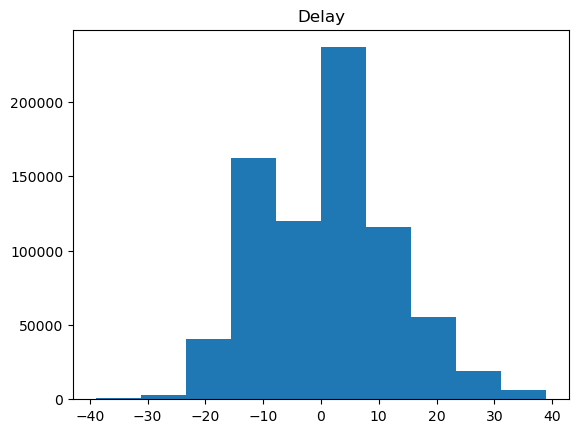

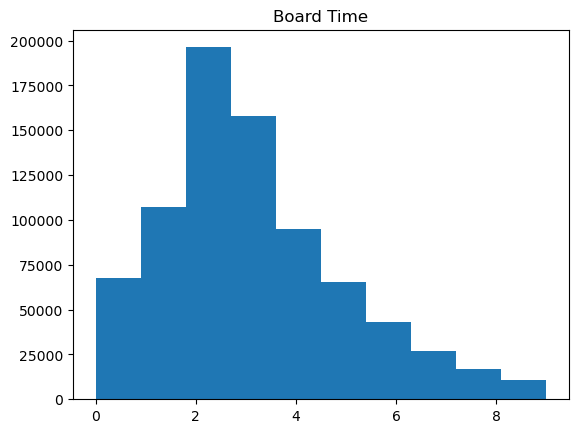

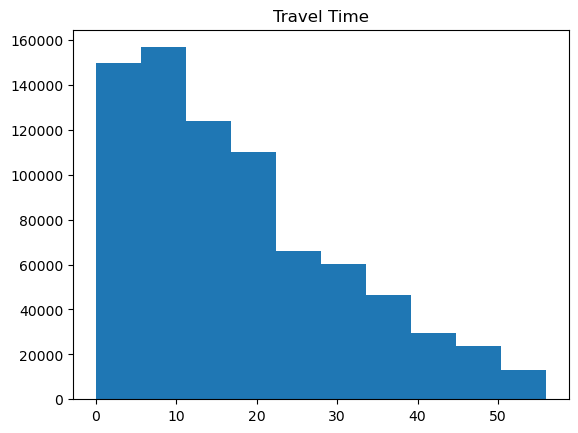

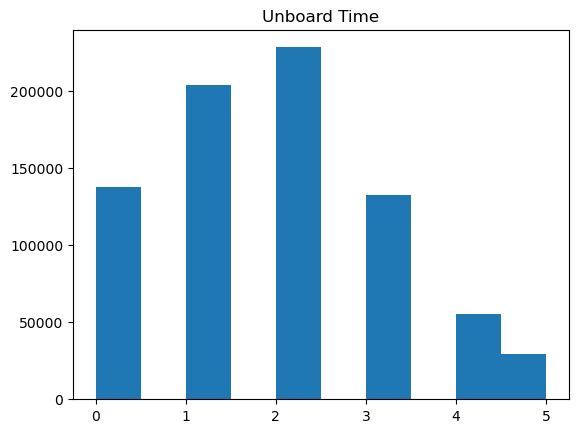

In [13]:
# create histograms for each column in calculated_array
for column in calculated_array:
    plt.hist(df[column], bins=10)
    plt.title(column)
    plt.show()